In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set_style('whitegrid')
sns.set_context('notebook')

# Loading Data

In [1252]:
data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Final Data\\gym_neighborhood_data.csv')

In [1253]:
area = data['Km2'].copy()

In [1254]:
cols = data.columns.tolist()

# Feature Engineering

In [1255]:
data['adult pop'] = data[data.columns.tolist()[23:29]].sum(axis=1)

In [1256]:
data['adult_pop/Km2'] = data['adult pop'] / data['Km2']

# Feature Selection: Population

In [1257]:
pop = data[['neighborhood', 'adult pop', 'adult_pop/Km2', 'target pop', 'target_pop/Km2', 'Km2']].set_index('neighborhood').copy()

# Data Transformation

In [1258]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [1259]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*5     # Colors to differentiate clusters

In [1260]:
pop_log = pop.apply(np.log1p)

pop_ss = ss().fit_transform(pop_log)
pop_mms = mms().fit_transform(pop_log)

#### Two Main Features

In [1261]:
pop2 = pop[['target_pop/Km2']].copy()

In [1262]:
pop_log2 = pop2.apply(np.log1p)

pop_ss2 = ss().fit_transform(pop_log2)
pop_mms2 = mms().fit_transform(pop_log2)

# Mean Shift Clustering

In [699]:
from sklearn.cluster import MeanShift

In [65]:
mean_shift = MeanShift(cluster_all=True)

mean_shift.fit(pop2)
pop['cluster'] = mean_shift.labels_

In [66]:
pop['cluster'].unique()

array([1, 0, 2, 4, 3], dtype=int64)

# K-Means Clustering

In [727]:
scrs = []
for n_clusters in range(1,12):
    kmeans = KMeans(n_clusters = n_clusters, n_init=100)
    kmeans.fit(pop_ss2)
    scrs.append([n_clusters, kmeans.inertia_])
    if n_clusters in range(30,2): print(n_clusters)
    
scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])


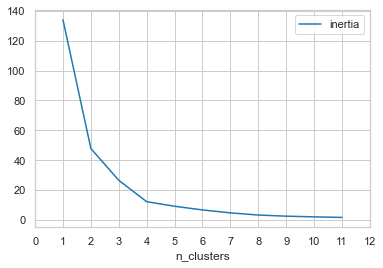

In [729]:
scrs_df.plot(x='n_clusters', y='inertia', xticks=np.linspace(0,12,13))

In [170]:
from sklearn.cluster import KMeans

In [1263]:
kmeans = KMeans(n_clusters = 6, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

In [1264]:
pop['cluster'].unique(), kmeans.n_iter_

(array([1, 2, 4, 0, 5, 3]), 3)

# Density Based Scan Clustering

In [114]:
from sklearn.cluster import DBSCAN

In [115]:
dbs = DBSCAN()

dbs.fit(pop2)

pop['cluster'] = dbs.labels_

In [92]:
pop['cluster'].unique()

array([ 0,  1,  2, -1,  3], dtype=int64)

# Cluster Visualization

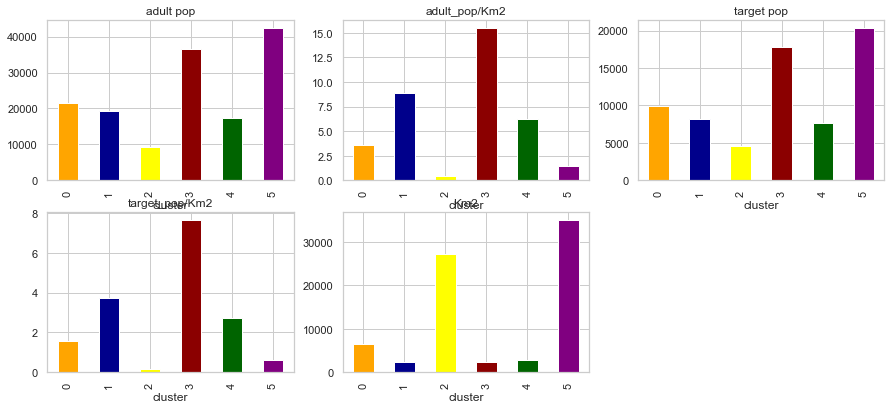

In [1265]:
pop_mean = pop.groupby('cluster').mean()

fig = plt.figure(figsize=(15,10))
axes = [fig.add_subplot(3,3,i) for i in range(1, len(pop.columns))]

for i, col in enumerate(pop_mean):
    pop_mean[col].plot(kind='bar', ax=axes[i], title=pop.columns[i], color=[colors[j] for j in range(len(pop['cluster'].unique()))])

### Boxplot

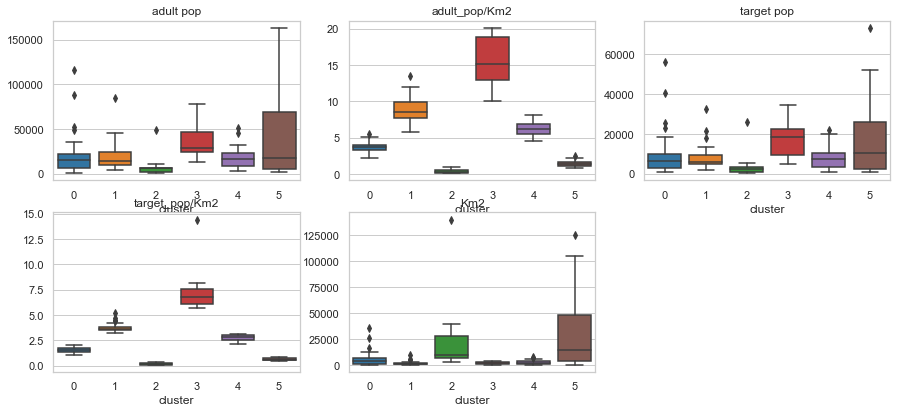

In [1266]:
fig = plt.figure(figsize=(15,10))
axes=[fig.add_subplot(3,3,i+1) for i in range(len(pop.columns)-1)]

for i in range(len(pop.columns)-1):
    
    sns.boxplot(data=pop, x='cluster', y=pop.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(pop.columns[i])
    
    #if i==len(income.columns)-3:
     #   axes[i].set_ylim(-10000000,1e9*0.2)
    
    #for j in range(len(pop['cluster'].unique())):
        #axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

### 3D Scatter Plot

In [1267]:
import matplotlib

In [ ]:
ys = pop.iloc[:, 1]
xs = pop.iloc[:, 2]
zs = pop.iloc[:, 3]
zss = pop.iloc[:, [0]]


for angle in range(1,360,7):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, cmap='RdBu', c=[colors[cluster] for cluster in pop['cluster']], alpha=1)#, s=zss.values/1000,

    ax0.set_ylabel(pop.columns[1], fontsize=12)
    ax0.set_xlabel(pop.columns[2], fontsize=12)
    ax0.set_zlabel(pop.columns[3], fontsize=12)


#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    ax0.view_init(angle-90, angle)
    plt.show()
    plt.pause(0.001)
    
    clear_output(wait=True)

### 2D Scatter Plot

#### Other Patterns: density per area likely follows different exponencial or y/x curves. Maybe if you cluster by Demogra

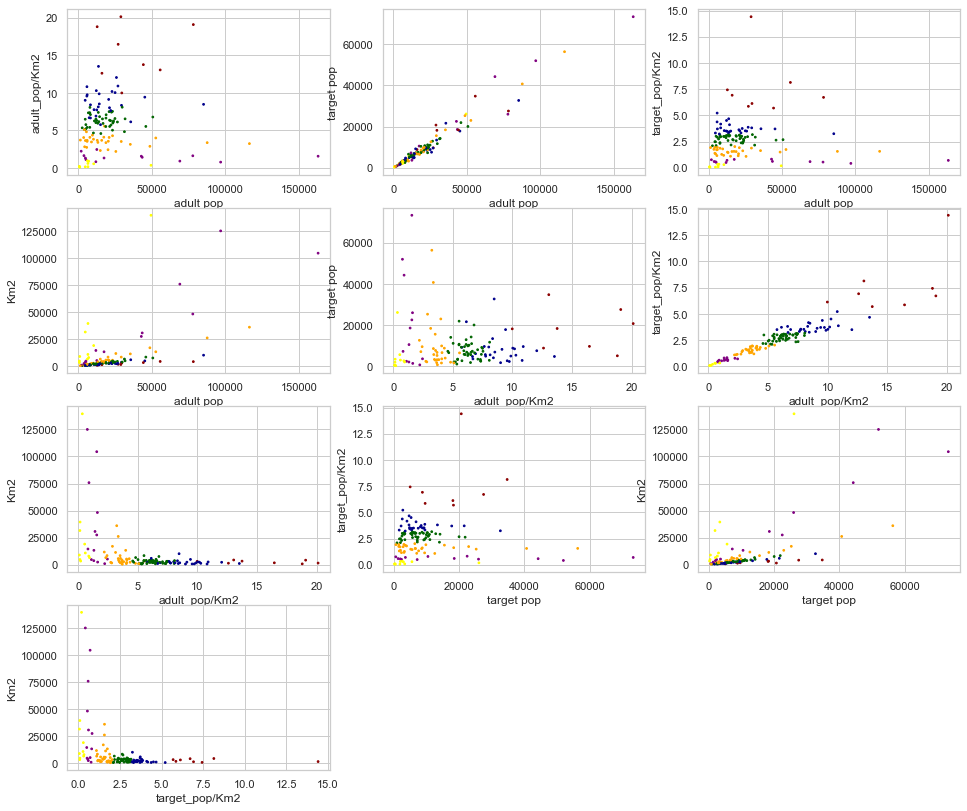

In [1268]:
fig = plt.figure(figsize=(16,14))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]

cnt = 0
for i in range(len(pop.columns)-1):
    for j in range(len(pop.columns)-1):
        
        if i<j:
            axes[cnt].scatter(x=pop[pop.columns[i]], y=pop[pop.columns[j]], c=[colors[cluster] for cluster in pop['cluster']], alpha=1, s=3)
            
            axes[cnt].set_xlabel(pop.columns[i])
            axes[cnt].set_ylabel(pop.columns[j])
            
            cnt+=1
plt.show()

In [1234]:
x1 = np.linspace(--1,10,100)
x2 = np.linspace(-20000,20000,100)
x3 = np.linspace(-30000,30000,100)
x4 = np.linspace(-40000,40000,100)
x5 = np.linspace(-50000,50000,100)
x15 = [x1,x2,x3,x4,x5]

y1 = np.linspace(-100,1200,100)
y2 = np.linspace(-1200,1200,100)
y3 = np.linspace(-1300,1300,100)
y4 = np.linspace(-1400,1400,100)
y5 = np.linspace(-1500,1500,100)
y15 = [y1,y2,y3,y4,y5]

x1 = np.linspace(-1,10, 100)
y1 = np.linspace(-100,1200, 100)
z1 = y1/x1

xs, ys = np.meshgrid(x1,y1)

zs = np.array([(y_i/x_i) for x_i, y_i in zip(xs, ys)])

z15 = []
for i in range(5):
    for j in range(5):
    
        z15.append(y15[i]/y15[j])
    
#z15 = [y/x_i for x_i in x15]

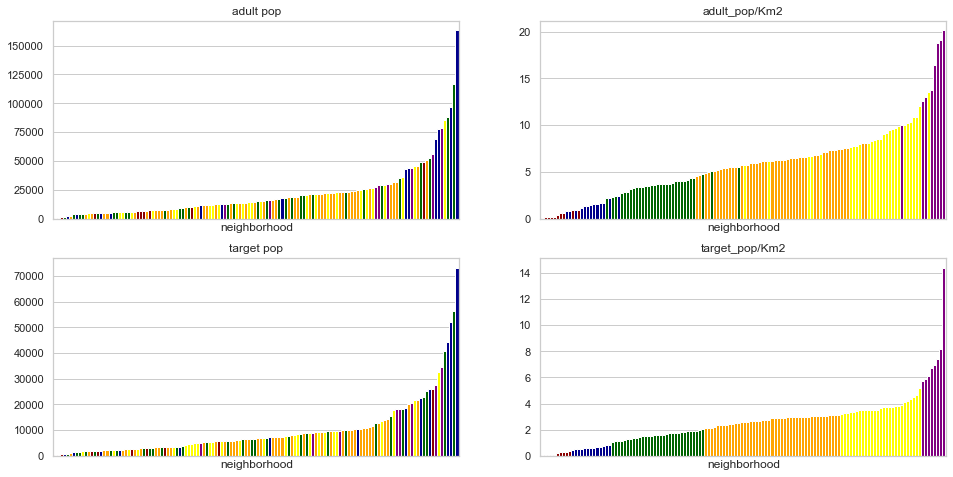

In [1099]:
fig = plt.figure(figsize=(16,8))

axes = [fig.add_subplot(2,2,i) for i in range(1,5)]

for i, col in zip(range(4), pop.columns[:-1]):
    
    pop.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in pop.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=1)

# Advanced Visualization

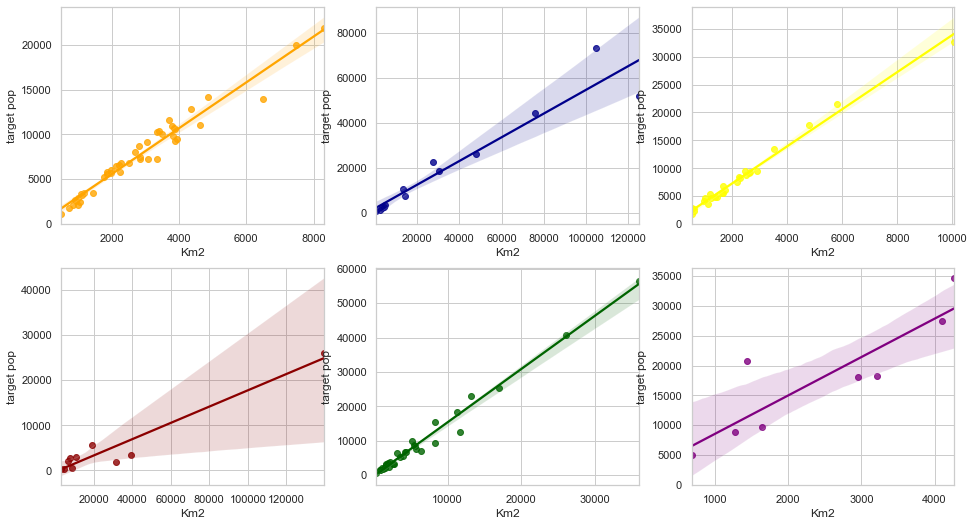

In [1100]:
fig = plt.figure(figsize=(16,28))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=colors[cluster])
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target pop', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

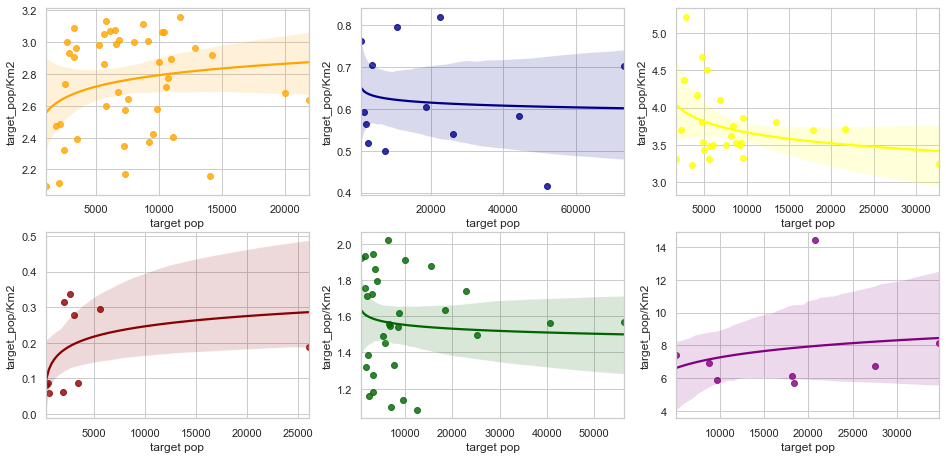

In [1106]:
fig = plt.figure(figsize=(16,24))
axes = [fig.add_subplot(6,3,i) for i in range(1,len(pop['cluster'].unique())+1)]

for i, cluster in enumerate(sorted(pop['cluster'].unique())):

    sns.regplot(data=pop[pop['cluster']==cluster], y='target_pop/Km2', x='target pop', ax=axes[i], color=colors[cluster], logx=True)
    #sns.regplot(data=pop[pop['cluster']==cluster], y='target_pop/Km2', x='Km2', ax=axes[i], color=(np.random.random(), np.random.random(), np.random.random()))
    

In [741]:
from IPython.display import clear_output
import time

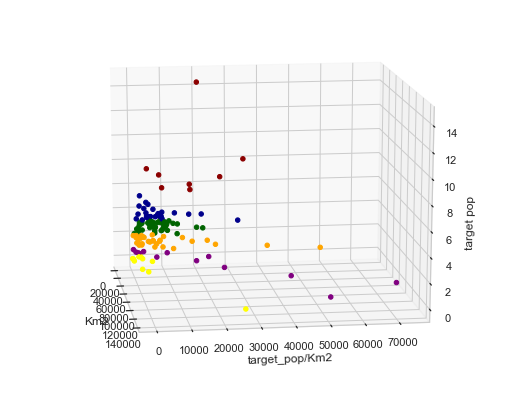

In [1272]:
xs = pop['Km2']
zs = pop['target_pop/Km2']
ys = pop['target pop']

for angle in range(0, 360, 8):

    fig = plt.figure(figsize=(9,7))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in pop['cluster']], alpha=1)

    ax0.set_xlabel('Km2', fontsize=12)
    ax0.set_ylabel('target_pop/Km2', fontsize=12)
    ax0.set_zlabel('target pop', fontsize=12)

    #ax0.set_xlim(-1000, 20000)
    #ax0.set_ylim(-1000, 40000)
    #ax0.set_zlim(-1, 8)

    ax0.view_init(15, angle)
    
    plt.draw()
    plt.pause(0.0001)
    
    clear_output(wait=True)

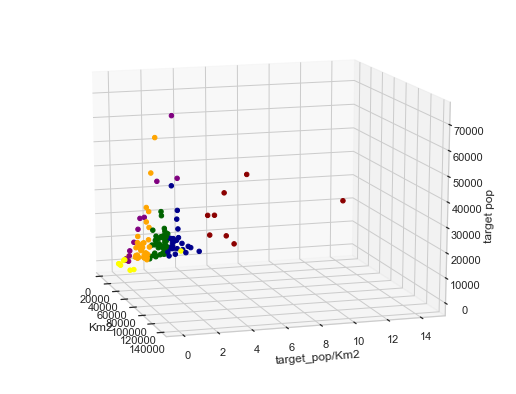

In [1271]:
xs = pop['Km2']
ys = pop['target_pop/Km2']
zs = pop['target pop']

for angle in range(1,360,18):
    
    fig = plt.figure(figsize=(9,7))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in pop['cluster']], alpha=1)

    ax0.set_xlabel('Km2', fontsize=12)
    ax0.set_ylabel('target_pop/Km2', fontsize=12)
    ax0.set_zlabel('target pop', fontsize=12)

#ax0.set_xlim(-1000, 20000)
#ax0.set_ylim(-1000, 40000)
#ax0.set_zlim(-1, 8)

#ax0.view_init(10,90)

    ax0.view_init(15, angle)
    
    plt.draw()
    plt.pause(0.0001)
    
    clear_output(wait=True)

# Clustering Optimization

In [1162]:
import warnings
warnings.simplefilter('ignore')

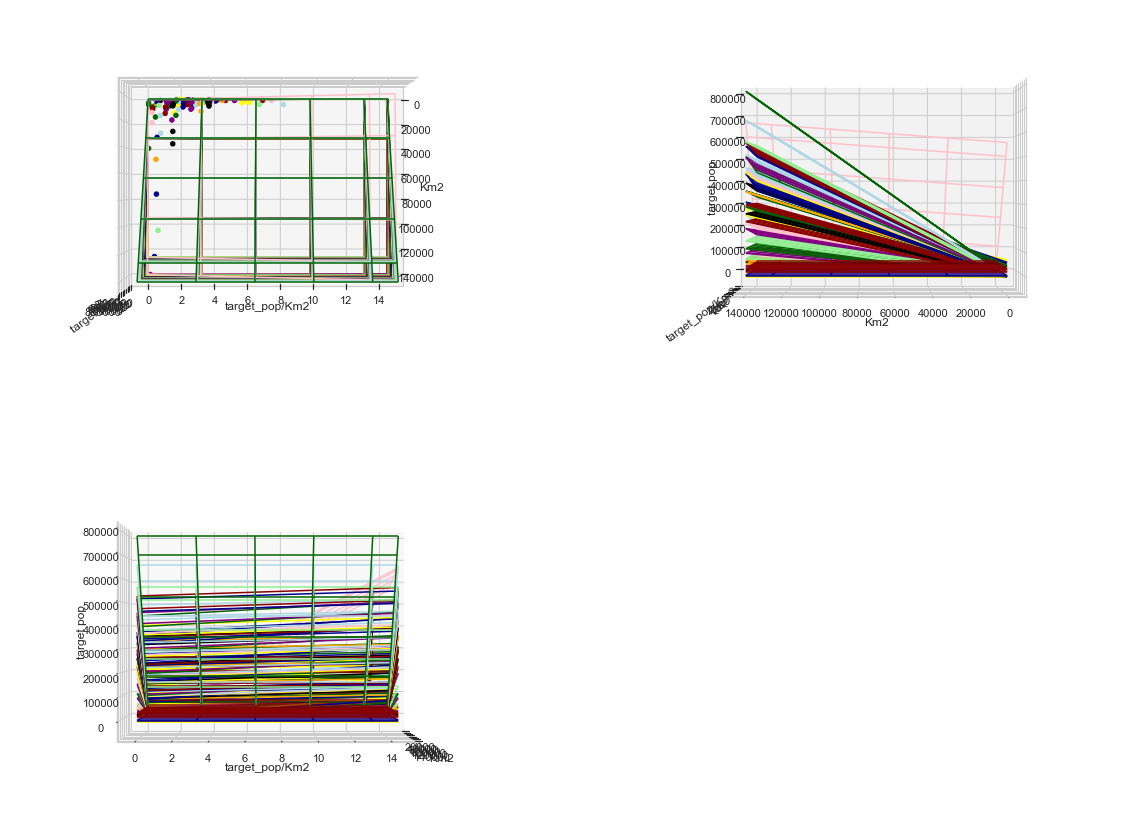

49


In [1169]:
scrs = []
for n_clusters in range(1,50):      #------------- K-Means Cluestering  (50 degrees)
    
    kmeans = KMeans(n_clusters = n_clusters, n_init=100)
    kmeans.fit(pop_ss2)
    pop['cluster'] = kmeans.labels_

    #---------------------------- Definig Variables
    
    z = pop[['target pop']]
#z = z[pop['cluster']!=3]

    x_df = pop[['Km2', 'target_pop/Km2']]#.loc[z.index]

    x = pop['Km2']#.loc[z.index]
    y = pop['target_pop/Km2']#.loc[z.index]

    clusters = pop['cluster']#.loc[z.index]
    sorted_clusters = pop.groupby('cluster').mean()['target_pop/Km2'].sort_values().index

    x_i = [x[clusters==cluster] for cluster in sorted_clusters]
    y_i = [y[clusters==cluster] for cluster in sorted_clusters]
    z_i = [z[clusters==cluster] for cluster in sorted_clusters]

    x_df_i = [x_df[clusters==cluster] for cluster in sorted_clusters]
    
    #------------------------------ Regression
    
    a1_i = []
    a2_i = []
    b_i = []

    for cluster in sorted_clusters:
    
        lr_obj = lr().fit(x_df[clusters==cluster], z[clusters==cluster])

        a1_i.append(lr_obj.coef_[0][0])
        a2_i.append(lr_obj.coef_[0][1])
        b_i.append(lr_obj.intercept_[0])

    #-----------------------------------   Calculating predicted z for x and y grid

    x1 = np.linspace(x.min(), x.max(), len(x))
    y1 = np.linspace(y.min(), y.max(), len(y))

    xs, ys = np.meshgrid(x1,y1)

    zs_i = [np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xs, ys)]) for a1, a2, b in zip(a1_i, a2_i, b_i)]

    z_pred_i = [a1*x_ii + a2*y_ii + b for a1, a2, b, x_ii, y_ii in zip(a1_i, a2_i, b_i, x_i, y_i)]
    
    #------------------------------------ Checking clusters sizes
    
    sizes = pop.groupby('cluster').count()['target_pop/Km2']
    less_than_3 = sum([size<3 for size in sizes])
   
    less_than_2 = sum([size<2 for size in sizes])
    try: less_than_2_clus = (sorted_clusters.tolist().index(sizes[sizes<2].index[0]) if len(sizes[sizes<2])==1 else [sorted_clusters.tolist().index(sizes[sizes<2].index.values[j]) for j in range(len(sizes[sizes<2]))])
    except: less_than_2_clus = None
    
    
    
    scrs.append([n_clusters, kmeans.inertia_, less_than_3, less_than_2, less_than_2_clus] + [r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)])
    
    
    #if n_clusters in range(1,50,5): print(n_clusters)
        
    #--------------------------------------- Plotting
    
    fig = plt.figure(figsize=(20, 15))
    axes = [fig.add_subplot(2,2,i, projection='3d') for i in [1,2,3]]


    for axis, angles in zip([0,1,2], [[90,0], [0,90], [0,0]]):
        for i, cluster in enumerate(clusters.unique()):
        
            axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=colors[cluster], alpha=1)
            axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)
        #rand_color = (np.random.random(), np.random.random(), np.random.random())
        #axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=rand_color, alpha=1)
        #axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=rand_color, alpha=1)

    #axes[0].set_xlim(-1000, 15000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 60000)    
    
        axes[axis].set_xlabel('Km2', fontsize=12)
        axes[axis].set_ylabel('target_pop/Km2', fontsize=12)
        axes[axis].set_zlabel('target pop', fontsize=12)
        
        axes[axis].view_init(angles[0], angles[1])
    
    plt.show()
    if n_clusters in range(1,50,1): print(n_clusters)  
    plt.pause(0.0001)
    
    clear_output(wait=True)
        
        
        
    
scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia', '<3', '<2', '<2_clus']+['cluster_'+str(i+1) for i in range(n_clusters)])


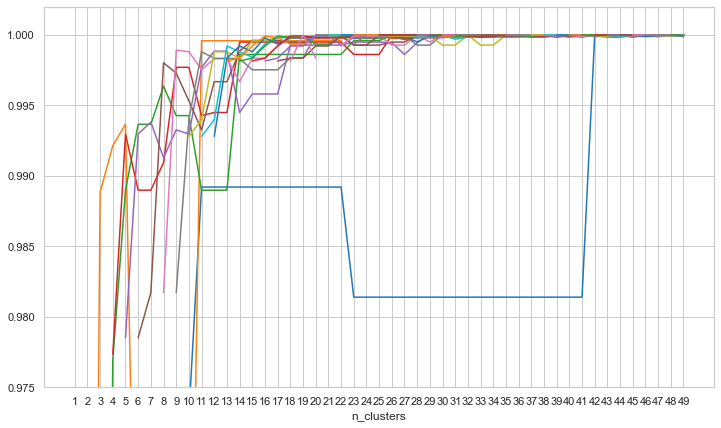

In [932]:
scrs_df.drop(['inertia', '<3', '<2', '<2_clus'], axis=1).plot(x='n_clusters', ylim=(0.975,1.002), xticks=range(1,50), figsize=(12,7), legend='')
#scrs_df.drop('inertia',axis=1).plot(x='n_clusters', xticks=range(1,18), figsize=(12,7))

In [ ]:
scrs_df#[['n_clusters', '<3', '<2', '<2_clus']]

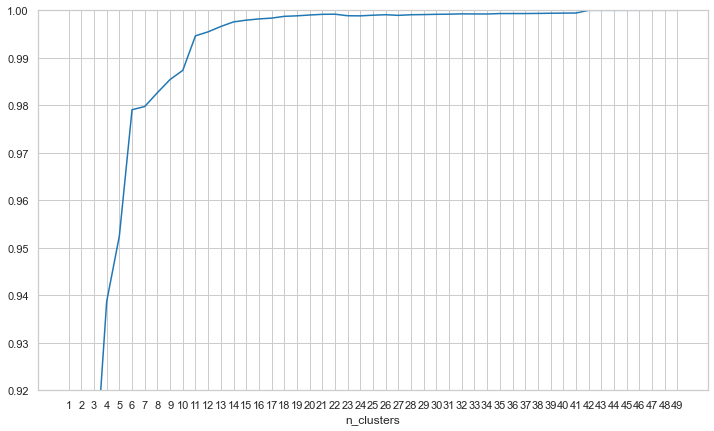

In [978]:
scrs_df.drop(['inertia', '<3', '<2', '<2_clus'], axis=1).set_index('n_clusters').mean(axis=1).plot(ylim=(0.92,1.0001), xticks=range(1,50), figsize=(12,7))
#scrs_df.drop(['inertia', '<3', '<2', '<2_clus'], axis=1).set_index('n_clusters').mean(axis=1).plot(ylim=(0.999,1.0001), xticks=range(1,50), figsize=(12,7))


# Feature Definition

In [1132]:
kmeans = KMeans(n_clusters = 6, n_init=100)
kmeans.fit(pop_ss2)
pop['cluster'] = kmeans.labels_

### All Clusters

In [1133]:
z = pop[['target pop']]
#z = z[pop['cluster']!=3]

x_df = pop[['Km2', 'target_pop/Km2']]#.loc[z.index]

x = pop['Km2']#.loc[z.index]
y = pop['target_pop/Km2']#.loc[z.index]

clusters = pop['cluster']#.loc[z.index]

x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

### Removing Outilers

In [981]:
z = pop[['target pop']]
z = z[z['target pop']<z['target pop'].max()]

x_df = pop[['Km2', 'target_pop/Km2']].loc[z.index]

x = pop['Km2'].loc[z.index]
y = pop['target_pop/Km2'].loc[z.index]

clusters = pop['cluster'].loc[z.index]

In [955]:
x_i = [x[clusters==cluster] for cluster in clusters.unique()]
y_i = [y[clusters==cluster] for cluster in clusters.unique()]
z_i = [z[clusters==cluster] for cluster in clusters.unique()]

x_df_i = [x_df[clusters==cluster] for cluster in clusters.unique()]

# Regression

In [1134]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

In [1135]:
a1_i = []
a2_i = []
b_i = []

for cluster in clusters.unique():
    
    lr_obj = lr().fit(x_df[clusters==cluster], z[clusters==cluster])

    a1_i.append(lr_obj.coef_[0][0])
    a2_i.append(lr_obj.coef_[0][1])
    b_i.append(lr_obj.intercept_[0])

In [1136]:
coefs = pd.DataFrame(np.transpose([a1_i, a2_i, b_i]), columns=['a1', 'a2', 'b'], index=clusters.unique())

In [1137]:
coefs['zx'] = coefs['a1']
coefs['zy'] = coefs['a2']
coefs['yz'] = 1 / coefs['a2']
coefs['xz'] = 1 / coefs['a1']
coefs['xy'] = - coefs['a2']
coefs['yx'] = - coefs['a1']

### Transform to radians and degrees to facilitate visualization

### Plot Planes intereceptions on x,y,z contants to compare across clusters.

In [1158]:
radians = np.arctan(coefs.iloc[:, 3:])

degrees = np.degrees(radians)

In [1159]:
degrees

,zx,zy,yz,xz,xy,yx
4,73.590351,89.936129,0.063871,16.409649,-89.936129,-73.590351
5,10.367295,89.995834,0.004166,79.632705,-89.995834,-10.367295
0,69.000155,89.977027,0.022973,20.999845,-89.977027,-69.000155
3,57.486179,89.987565,0.012435,32.513821,-89.987565,-57.486179
1,29.451286,89.998530,0.001470,60.548714,-89.998530,-29.451286
2,82.235438,89.965156,0.034844,7.764562,-89.965156,-82.235438


### Calculating predicted z for x and y grid

In [1139]:
x1 = np.linspace(x.min(), x.max(), len(x))
y1 = np.linspace(y.min(), y.max(), len(y))

xs, ys = np.meshgrid(x1,y1)

zs_i = [np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xs, ys)]) for a1, a2, b in zip(a1_i, a2_i, b_i)]

z_pred_i = [a1*x_ii + a2*y_ii + b for a1, a2, b, x_ii, y_ii in zip(a1_i, a2_i, b_i, x_i, y_i)]

In [1140]:
[r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)]

[0.9929736821714226,
 0.973016499765538,
 0.9889865588358695,
 0.9936645435276508,
 0.9472135138980482,
 0.9785185632411348]

### Calculating predicted z for smaller x and y grid

In [787]:
x1 = np.linspace(x.min() - (x.max()-x.min())/60, x.max() - (x.max()-x.min())*4/5, len(x))
y1 = np.linspace(y.min(), y.max(), len(y))

xs, ys = np.meshgrid(x1,y1)

zs_i = [np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xs, ys)]) for a1, a2, b in zip(a1_i, a2_i, b_i)]

z_pred_i = [a1*x_ii + a2*y_ii + b for a1, a2, b, x_ii, y_ii in zip(a1_i, a2_i, b_i, x_i, y_i)]

In [1050]:
[r2_score(z_ii, z_pred_ii) for z_ii, z_pred_ii in zip(z_i, z_pred_i)]

[0.8993521293445592, 0.8082874368909158, 0.9888403397263346]

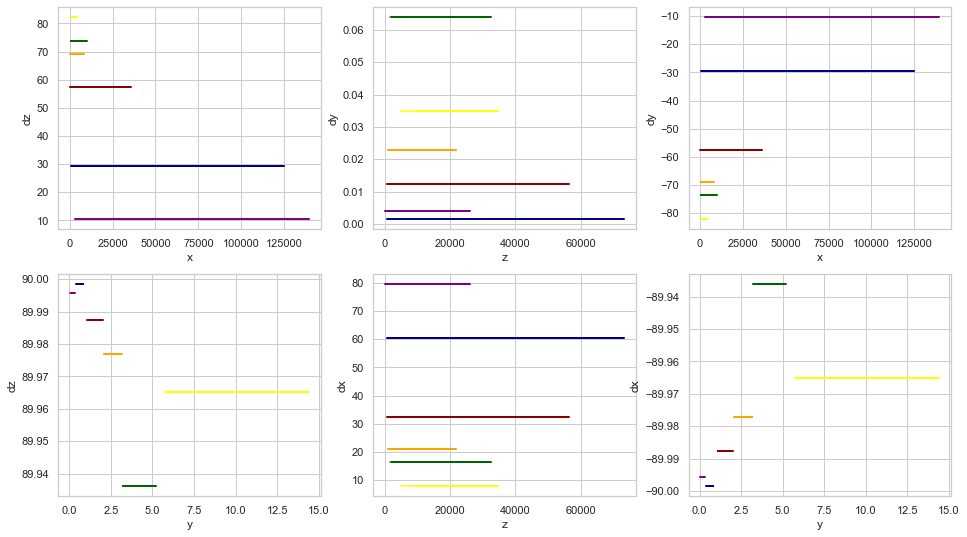

In [1160]:
fig, axes = plt.subplots(2,3, figsize=(16,9))

[axes[0][0].plot(x[clusters==cluster], [degrees.loc[cluster, 'zx']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]
[axes[0][1].plot(z[clusters==cluster], [degrees.loc[cluster, 'yz']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]
[axes[0][2].plot(x[clusters==cluster], [degrees.loc[cluster, 'yx']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]
[axes[1][0].plot(y[clusters==cluster], [degrees.loc[cluster, 'zy']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]
[axes[1][1].plot(z[clusters==cluster], [degrees.loc[cluster, 'xz']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]
[axes[1][2].plot(y[clusters==cluster], [degrees.loc[cluster, 'xy']]*len(x[clusters==cluster]), color=colors[cluster]) for cluster in clusters.unique()]

axes[0][0].set_xlabel('x')
axes[0][1].set_xlabel('z')
axes[0][2].set_xlabel('x')
axes[1][0].set_xlabel('y')
axes[1][1].set_xlabel('z')
axes[1][2].set_xlabel('y')

axes[0][0].set_ylabel('dz')
axes[0][1].set_ylabel('dy')
axes[0][2].set_ylabel('dy')
axes[1][0].set_ylabel('dz')
axes[1][1].set_ylabel('dx')
axes[1][2].set_ylabel('dx')

#axes[0][0].set_ylim(0)
#axes[0][1].set_ylim(0)
#axes[0][2].set_ylim(0)
#axes[1][0].set_ylim(0)
#axes[1][1].set_ylim(0)
#axes[1][2].set_ylim(0)


plt.show()

### Plotting

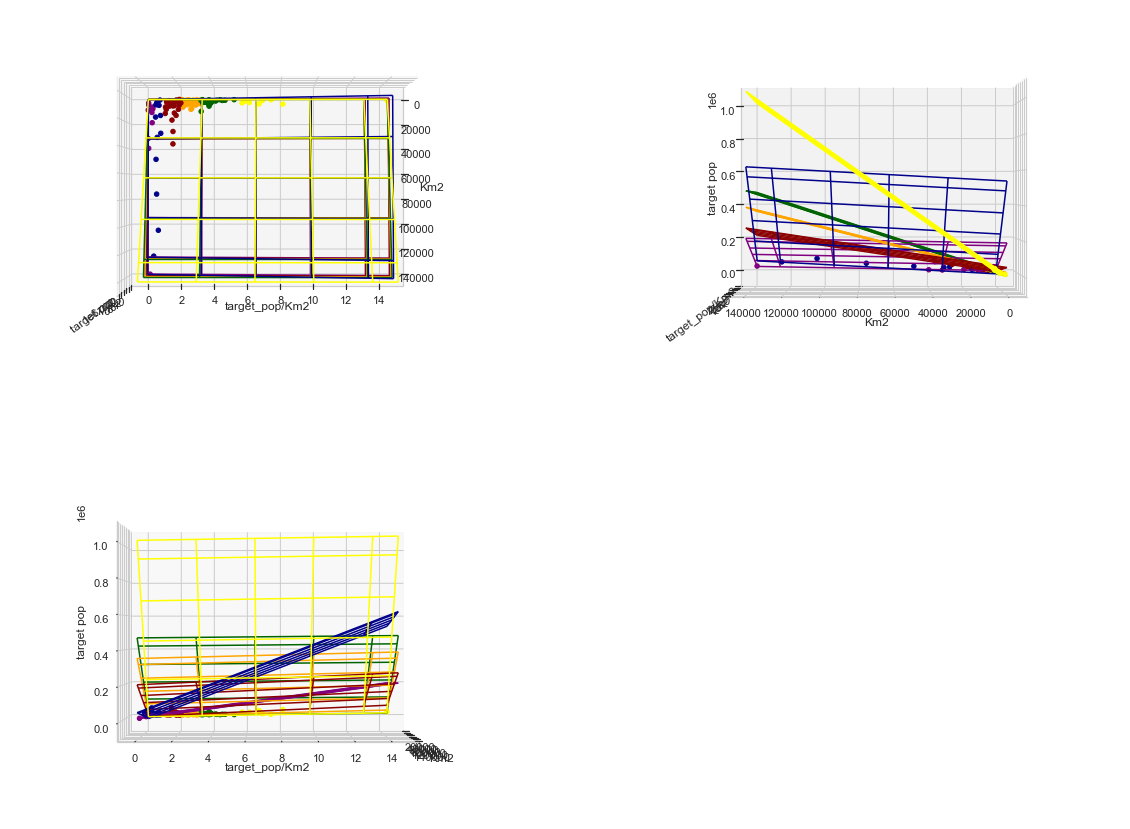

In [1161]:
fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(2,2,i, projection='3d') for i in [1,2,3]]


for axis, angles in zip([0,1,2], [[90,0], [0,90], [0,0]]):
    for i, cluster in enumerate(clusters.unique()):
        
        axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=colors[cluster], alpha=1)
        axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)
        #rand_color = (np.random.random(), np.random.random(), np.random.random())
        #axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=rand_color, alpha=1)
        #axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=rand_color, alpha=1)

    #axes[0].set_xlim(-1000, 15000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 60000)    
    
    axes[axis].set_xlabel('Km2', fontsize=12)
    axes[axis].set_ylabel('target_pop/Km2', fontsize=12)
    axes[axis].set_zlabel('target pop', fontsize=12)
        
    axes[axis].view_init(angles[0], angles[1])


### Plotting: More collors

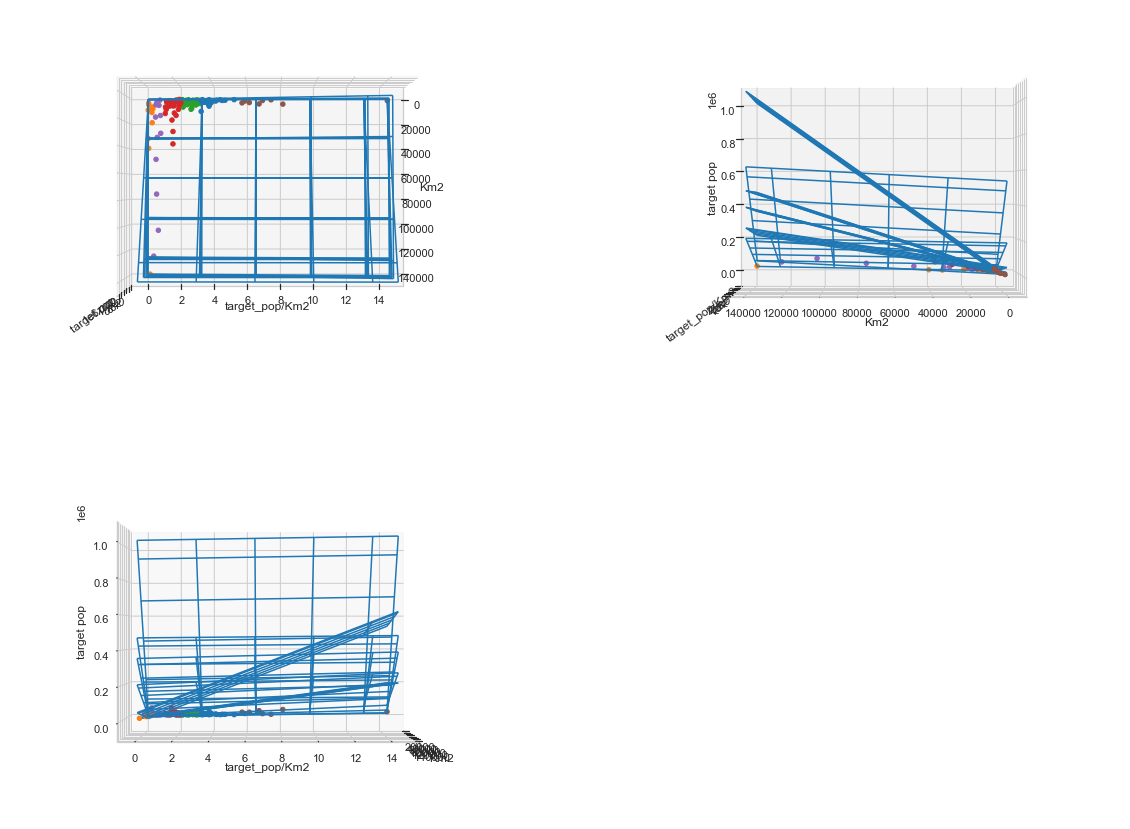

In [1143]:
fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(2,2,i, projection='3d') for i in [1,2,3]]


for axis, angles in zip([0,1,2], [[90,0], [0,90], [0,0]]):
    for i, cluster in enumerate(clusters.unique()):
        
#        axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=colors[cluster], alpha=1)
#        axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)
        #rand_color = (np.random.random(), np.random.random(), np.random.random())
        
        axes[axis].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, alpha=1)
        axes[axis].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], alpha=1)

    #axes[0].set_xlim(-1000, 15000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 60000)    
    
    axes[axis].set_xlabel('Km2', fontsize=12)
    axes[axis].set_ylabel('target_pop/Km2', fontsize=12)
    axes[axis].set_zlabel('target pop', fontsize=12)
        
    axes[axis].view_init(angles[0], angles[1])


In [1030]:
rand_colors = [(np.random.random(), np.random.random(), np.random.random()) for times in range(len(clusters.unique()))]
rand_colors_lists = [[rand_colors[cluster] for times in range(len(x[clusters==cluster]))] for cluster in clusters.unique()]

### Rotating

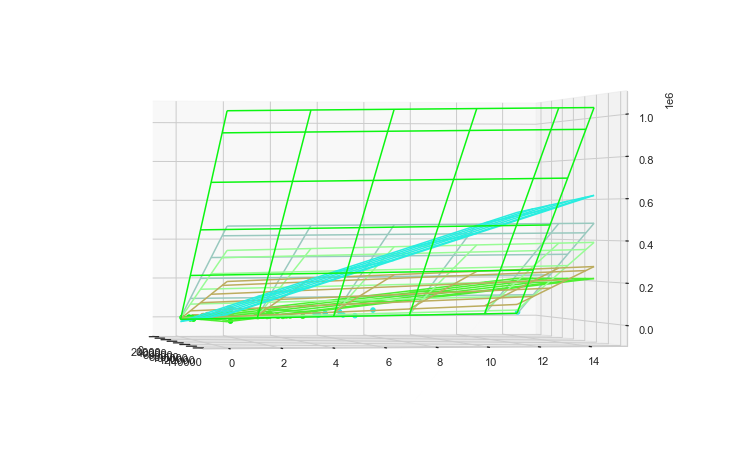

In [1031]:
for angle in range(0,360,10):
    
    

    fig = plt.figure(figsize=(13, 8))
    axes = [fig.add_subplot(111, projection='3d')]

    for i, cluster in enumerate(clusters.unique()):

        axes[0].plot_wireframe(xs, ys, zs_i[i], rstride=30, cstride=30, color=rand_colors[i], alpha=1)
        #axes[0].scatter(x[i], y_i[i], z_i[i], c=colors[cluster], alpha=1)
        axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=rand_colors_lists[i], alpha=1)

    #axes[0].set_xlim(-1000, 30000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 200000)    
    
        
    axes[0].view_init(0,angle)
    
    plt.show()
    plt.pause(0.0001)
    clear_output(wait=True)

### Thight x, y grid for each cluster

In [1065]:
x1_i = [np.linspace(x_ii.min(), x_ii.max(), len(x_ii)) for x_ii in x_i]
yi_1 = [np.linspace(y_ii.min(), y_ii.max(), len(y_ii)) for y_ii in y_i]

xys_i = [np.meshgrid(x1,y1) for x1, y1 in zip(x1_i, y1_i)]

zs_i = [np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xys[0], xys[1])]) for a1, a2, b, xys in zip(a1_i, a2_i, b_i, xys_i)]

#z_pred_i = [a1*x_ii + a2*y_ii + b for a1, a2, b, x_ii, y_ii in zip(a1_i, a2_i, b_i, x_i, y_i)]

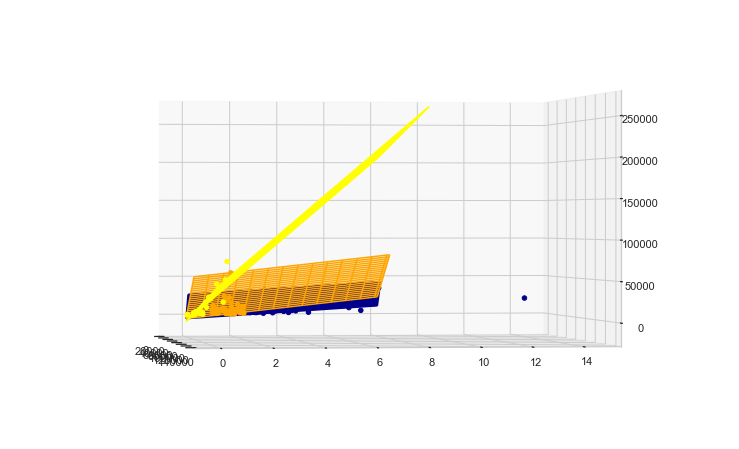

In [1067]:
for angle in range(0,360,16):
    

    fig = plt.figure(figsize=(13, 8))
    axes = [fig.add_subplot(111, projection='3d')]

    for i, cluster in enumerate(clusters.unique()):
        
        axes[0].plot_wireframe(xys_i[i][0], xys_i[i][1], zs_i[i], rstride=10, cstride=2, color=colors[cluster], alpha=1)
        #axes[0].scatter(x[i], y_i[i], z_i[i], c=colors[cluster], alpha=1)
        axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    #axes[0].set_xlim(-1000, 30000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 200000)    
    
        
    axes[0].view_init(0,angle)
    
    plt.show()
    plt.pause(0.0001)
    clear_output(wait=True)

### Separate different x, y grid for each cluster

In [1070]:
#x1_i = [np.linspace(x_ii.min() - (x_ii.max()-x_ii.min())/60, x_ii.max() - (x_ii.max()-x_ii.min())*4/5, len(x_ii)) for x_ii in x_i]
#yi_1 = [np.linspace(y_ii.min() - (y_ii.max()-y_ii.min())/60, y_ii.max() - (y_ii.max()-y_ii.min())*4/5, len(y_ii)) for y_ii in y_i]
x1_i = [np.linspace(x_ii.min(), x_ii.max(), len(x_ii)) for x_ii in x_i]
yi_1 = [np.linspace(y_ii.min(), y_ii.max(), len(y_ii)) for y_ii in y_i]

xys_i = [np.meshgrid(x1,y1) for x1, y1 in zip(x1_i, y1_i)]

zs_i = [np.array([(a1*x_i + a2*y_i + b) for x_i, y_i in zip(xys[0], xys[1])]) for a1, a2, b, xys in zip(a1_i, a2_i, b_i, xys_i)]

#z_pred_i = [a1*x_ii + a2*y_ii + b for a1, a2, b, x_ii, y_ii in zip(a1_i, a2_i, b_i, x_i, y_i)]

In [1071]:

for i, cluster in enumerate(clusters.unique()):
    
    
    for angle in range(0,360,16):
        
        fig = plt.figure(figsize=(13, 8))
        axes = [fig.add_subplot(111, projection='3d')]
    
        axes[0].plot_wireframe(xys_i[i][0], xys_i[i][1], zs_i[i], rstride=10, cstride=2, color=colors[cluster], alpha=1)
        axes[0].scatter(x[clusters==cluster], y[clusters==cluster], z[clusters==cluster], c=colors[cluster], alpha=1)

    #axes[0].set_xlim(-1000, 30000)
    #axes[0].set_ylim(-1, 5)
    #axes[0].set_zlim(-10000, 200000)    
    
        
        axes[0].view_init(8,angle)
    
        plt.show()
        plt.pause(0.0001)
        clear_output(wait=True)
    
    control = input('Press Enter to display next cluster. Insert "exit" to leave:')
    if control == 'exit': break

Press Enter to display next cluster. Insert "exit" to leave: 


# 2D Regression Analysis

#### Optimize n_clusters with 2d regression scores: Check whether y(x) forms z=y/x 

#### try: y = a1x + b and z = (a1x+b) / x or z = a1 + b/x

#### try: plot 3d surf or wireframe of clusters found by total target population. try to fit the above equation of z per x.